<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WithOut Transfer Learning**



In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow
import keras

In [ ]:
images = []
labels = []

In [4]:
dataset_path = '/content/drive/MyDrive/ComputerVisionCoLabFiles/CNN/train/'
folders = os.listdir(dataset_path)
folders

['sad', 'angry', 'neutral', 'disgust', 'fear', 'surprise', 'happy', 'model.h5']

In [5]:
name_mapping_dict = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}
print(inv_name_mapping_dict)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_size = 100

In [ ]:
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')
  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: sad
Processing folder: angry
Processing folder: neutral
Processing folder: disgust
Processing folder: fear
Processing folder: surprise
Processing folder: happy


In [ ]:
images = np.expand_dims(images, axis=3)
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (28847, 100, 100, 1)
labels shape :  (28847,)


In [ ]:
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [ ]:
images = np.array(images) / 255

In [ ]:
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

5

In [ ]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (25962, 100, 100, 1) (25962, 7)
Testing data shape :  (2885, 100, 100, 1) (2885, 7)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 4, padding="same", activation="relu", input_shape=(img_size, img_size,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 4, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 4, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 4, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

I ran below cell model.fit for first time it started from 0.3 accuracy and improved gradually. I accediently again ran it, it lost the previous result(output of epochs) and started epochs from 1 but this time from accuracy of 0.97. It took almost 3 hours 45 mints for first run. I can now re run from start to show the results but I don't know how much time it will take in this second run I don't have the enough time to run it for the 3rd time:( So leaving it as it is. 

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=25, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/25
203/203 [==============================] - 534s 3s/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 4.0605 - val_accuracy: 0.5567
Epoch 2/25
203/203 [==============================] - 531s 3s/step - loss: 0.0693 - accuracy: 0.9784 - val_loss: 4.3510 - val_accuracy: 0.5504
Epoch 3/25
203/203 [==============================] - 528s 3s/step - loss: 0.0701 - accuracy: 0.9790 - val_loss: 4.1418 - val_accuracy: 0.5560
Epoch 4/25
203/203 [==============================] - 527s 3s/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 4.1006 - val_accuracy: 0.5473
Epoch 5/25
203/203 [==============================] - 525s 3s/step - loss: 0.0605 - accuracy: 0.9809 - val_loss: 4.3318 - val_accuracy: 0.5511
Epoch 6/25
203/203 [==============================] - 527s 3s/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 4.6167 - val_accuracy: 0.5445
Epoch 7/25
203/203 [==============================] - 525s 3s/step - loss: 0.0849 - accuracy: 0.9739 - val_loss: 4.2712 - val_accuracy: 0.5421

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))

91/91 [==============================] - 13s 147ms/step - loss: 4.7752 - accuracy: 0.5490
Evaluation result on Test Data : Loss = 4.775172710418701, accuracy = 54.90468144416809


In [ ]:
model.save(dataset_path+'model.h5')

**Using Transfer Learning**

In [6]:
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [7]:
images1 = []
labels1 = []

In [9]:
folders = os.listdir(dataset_path)
folders

['sad', 'angry', 'neutral', 'disgust', 'fear', 'surprise', 'happy', 'model.h5']

In [10]:
img_size = 64

In [11]:
name_mapping_dict = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}
print(inv_name_mapping_dict)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [12]:
for folder in folders:
  print(f'Processing folder: {folder}')
  if(folder != "model.h5"):
    filenames = os.listdir(dataset_path+folder+'/')
    for fname in filenames:
      img = plt.imread(dataset_path+folder+'/'+fname)
      img = cv2.resize(img, (img_size, img_size))
      images1.append(img)
      labels1.append(name_mapping_dict[folder])

Processing folder: sad
Processing folder: angry
Processing folder: neutral
Processing folder: disgust
Processing folder: fear
Processing folder: surprise
Processing folder: happy
Processing folder: model.h5


In [13]:
def expand_greyscale_image_channels(grey):
    grey_image = np.array(grey)
    grey_image = np.expand_dims(grey, -1)
    grey_image_arr_3_channel = grey_image.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [14]:
images1 = expand_greyscale_image_channels(images1)
labels1 = np.array(labels1)

In [15]:
print('images shape : ', images1.shape)
print('labels shape : ', labels1.shape)

images shape :  (28847, 64, 64, 3)
labels shape :  (28847,)


In [16]:
classes = np.unique(labels1)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [17]:
images1 = np.array(images1) / 255

In [18]:
labels_one_hot = to_categorical(labels1)

In [19]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images1, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (23077, 64, 64, 3) (23077, 7)
Testing data shape :  (5770, 64, 64, 3) (5770, 7)


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

pretrained_model = tf.keras.applications.ResNet50(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

94781440/94765736 [==============================] - 1s 0us/step


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, batch_size=32,  epochs=10, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/10
722/722 [==============================] - 432s 599ms/step - loss: 1.6497 - accuracy: 0.3493 - val_loss: 1.6496 - val_accuracy: 0.3610
Epoch 2/10
722/722 [==============================] - 436s 603ms/step - loss: 1.6497 - accuracy: 0.3470 - val_loss: 1.6488 - val_accuracy: 0.3645
Epoch 3/10
722/722 [==============================] - 429s 594ms/step - loss: 1.6490 - accuracy: 0.3516 - val_loss: 1.6500 - val_accuracy: 0.3648
Epoch 4/10
722/722 [==============================] - 439s 609ms/step - loss: 1.6463 - accuracy: 0.3498 - val_loss: 1.6604 - val_accuracy: 0.3402
Epoch 5/10
722/722 [==============================] - 438s 607ms/step - loss: 1.6425 - accuracy: 0.3516 - val_loss: 1.6962 - val_accuracy: 0.3312
Epoch 6/10
722/722 [==============================] - 436s 604ms/step - loss: 1.6435 - accuracy: 0.3506 - val_loss: 1.6655 - val_accuracy: 0.3459
Epoch 7/10
722/722 [==============================] - 445s 617ms/step - loss: 1.6406 - accuracy: 0.3548 - val_loss: 1.6404 -

In [25]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

181/181 [==============================] - 107s 590ms/step - loss: 1.6390 - accuracy: 0.3669
Evaluation result on Test Data : Loss = 1.6389561891555786, accuracy = 36.68977618217468%


In [26]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

722/722 [==============================] - 337s 467ms/step - loss: 1.6177 - accuracy: 0.3678
Evaluation result on train Data : Loss = 1.6176656484603882, accuracy = 36.78120970726013%


In [27]:
model.save(dataset_path+'Pre_model.h5')

In [41]:
def test_single_image(model,test_img_number):

  # make prediction
  prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
  print("Model prediction: {}".format(prediction))

  # Display the predicted image
  plt.imshow(test_images[test_img_number])
  plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

Model prediction: sad


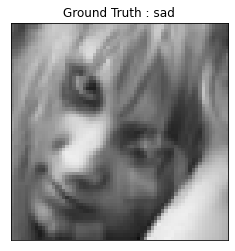

In [42]:
test_single_image(model,8)

Model prediction: happy


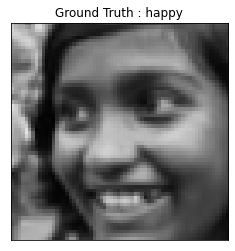

In [43]:
test_single_image(model,97)

Model prediction: happy


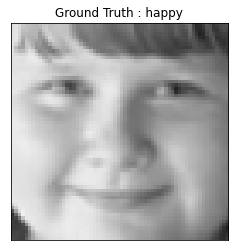

In [49]:
test_single_image(model,334)

Model prediction: happy


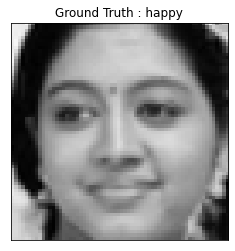

In [50]:
test_single_image(model,454)

Model prediction: fear


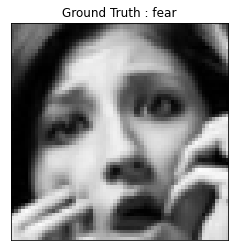

In [51]:
test_single_image(model,1954)

Model prediction: happy


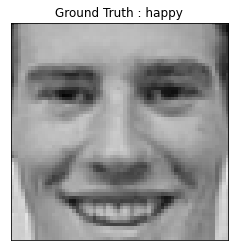

In [53]:
test_single_image(model,1600)

Model prediction: happy


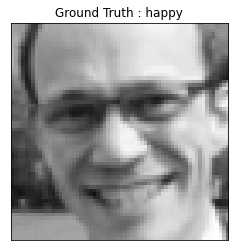

In [55]:
test_single_image(model,4567)

Model prediction: surprise


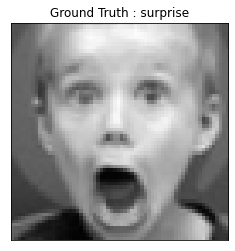

In [65]:
test_single_image(model,4092)